In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv("ev_data.csv")
df.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2
1,27,Ahmedabad,NaN,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4


In [6]:
df.isnull().sum()

,0
age,0
city,0
profession,455
marital_stat,0
education,0
family_count,0
annual_income,0
replace_with_ev,0
preferred_ev_type,0
think_ev_are_economical,0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    object 
 2   profession               535 non-null    object 
 3   marital_stat             990 non-null    object 
 4   education                990 non-null    object 
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    object 
 8   preferred_ev_type        990 non-null    object 
 9   think_ev_are_economical  990 non-null    object 
 10  preferred_brand          990 non-null    object 
 11  preferred_price_range    990 non-null    object 
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 100.7+ KB


In [8]:
df.describe()

,age,family_count,annual_income,preferred_wheel_count
count,990.000000,990.000000,9.900000e+02,990.000000
mean,31.802020,4.116162,2.261180e+06,3.350505
std,11.279929,1.469488,1.001444e+06,0.886578
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.794900e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.758737e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [9]:
df1 = df.drop(['profession', 'education', 'think_ev_are_economical', 'family_count'], axis = 1)
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Single,1.770466e+06,Yes,SUV,MG,<5 lakhs,2
1,27,Ahmedabad,Single,7.600731e+05,Yes,SUV,Nissan,<15 lakhs,4
2,28,Pune,Single,2.779701e+06,Maybe,Sedan,Honda,<5 lakhs,4
3,26,Pune,Single,1.473698e+06,Yes,Sedan,Tata,<25 lakhs,2
4,25,Pune,Single,2.430643e+06,Yes,Sedan,Hyundai,<15 lakhs,4


## Customer segmentation based on if they would like to change their current vehicle with a new EV

In [10]:
rwe = df1['replace_with_ev'].value_counts()
rwe

,count
replace_with_ev,
Yes,655
Maybe,200
No,135


In [11]:
ms = df1['marital_stat'].value_counts()
ms

,count
marital_stat,
Single,631
Married,359


In [12]:
pb = df1['preferred_brand'].value_counts()
pb

,count
preferred_brand,
Tata,184
Hyundai,164
Honda,143
KIA,142
Nissan,121
Maruti,58
MG,55
Volkswagen,42
McLaren,18


In [13]:
pev = df1['preferred_ev_type'].value_counts()
pev

,count
preferred_ev_type,
SUV,462
Sedan,237
Hatchback,144
Liftback,118
Cabrio,29


In [14]:
ppr = df1['preferred_price_range'].value_counts()
ppr

,count
preferred_price_range,
<15 lakhs,479
<5 lakhs,285
<25 lakhs,145
>25 lakhs,34
1200000,14
2000000,12
1500000,11
700000,10


In [15]:
df1['preferred_price_range'] = df1['preferred_price_range'].replace({'<15 lakhs' : '15','<5 lakhs' : '5','<25 lakhs' : '25','>25 lakhs' : '30','1200000' : '12','2000000' : '20','1500000' : '15','700000' : '7'})
df1.head()


,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Single,1.770466e+06,Yes,SUV,MG,5,2
1,27,Ahmedabad,Single,7.600731e+05,Yes,SUV,Nissan,15,4
2,28,Pune,Single,2.779701e+06,Maybe,Sedan,Honda,5,4
3,26,Pune,Single,1.473698e+06,Yes,Sedan,Tata,25,2
4,25,Pune,Single,2.430643e+06,Yes,Sedan,Hyundai,15,4


In [16]:
df1["city"] = df1["city"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["city"] = df1["city"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["city"] = df1["city"].replace({"Banglore ":"Bengaluru"})
df1["city"] = df1["city"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["city"] = df1["city"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["city"] = df1["city"].replace({"nashik":"Nashik"})

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    990 non-null    int64  
 1   city                   990 non-null    object 
 2   marital_stat           990 non-null    object 
 3   annual_income          990 non-null    float64
 4   replace_with_ev        990 non-null    object 
 5   preferred_ev_type      990 non-null    object 
 6   preferred_brand        990 non-null    object 
 7   preferred_price_range  990 non-null    object 
 8   preferred_wheel_count  990 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 69.7+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df1['city'] = le.fit_transform(df1['city'].astype(str))
df1['marital_stat'] = le.fit_transform(df1['marital_stat'].astype(str))
df1['replace_with_ev'] = le.fit_transform(df1['replace_with_ev'].astype(str))
df1['preferred_ev_type'] = le.fit_transform(df1['preferred_ev_type'].astype(str))
df1['preferred_brand'] = le.fit_transform(df1['preferred_brand'].astype(str))
df1['preferred_price_range'] = le.fit_transform(df1['preferred_price_range'].astype(str))

In [24]:
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,16,1,1.770466e+06,2,3,6,5,2
1,27,0,1,7.600731e+05,2,3,12,1,4
2,28,19,1,2.779701e+06,0,4,3,5,4
3,26,19,1,1.473698e+06,2,4,14,3,2
4,25,19,1,2.430643e+06,2,4,4,1,4


In [25]:
col_avg = np.round(df1.mean(), 2)
col_avg

,0
age,31.80
city,16.10
marital_stat,0.64
annual_income,2261179.88
replace_with_ev,1.46
preferred_ev_type,2.74
preferred_brand,7.77
preferred_price_range,2.60
preferred_wheel_count,3.35


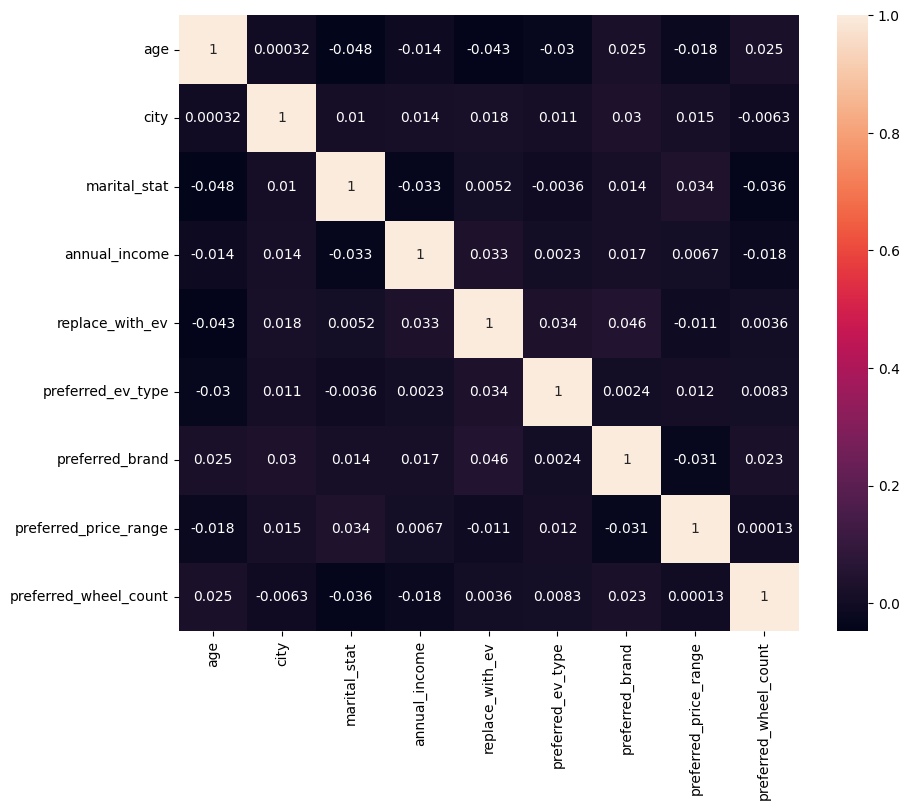

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
df_scaled = scaler.fit_transform(df1)
df2 = pd.DataFrame(df_scaled, columns = df1.columns)
df2.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,-0.159835,-0.018039,0.75428,-0.490254,0.669051,0.242489,-0.392423,1.337083,-1.524048
1,-0.425929,-3.025745,0.75428,-1.499700,0.669051,0.242489,0.934267,-0.887643,0.732956
2,-0.337231,0.545906,0.75428,0.518035,-1.807062,1.180238,-1.055768,1.337083,0.732956
3,-0.514627,0.545906,0.75428,-0.786744,0.669051,1.180238,1.376497,0.224720,-1.524048
4,-0.603325,0.545906,0.75428,0.169305,0.669051,1.180238,-0.834653,-0.887643,0.732956


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [30]:
df3 = pca.fit_transform(df2)
df3.shape

(990, 2)

In [31]:
pca_df = pd.DataFrame(data = df3, columns = ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.232981,-1.337737
1,0.421178,-0.093417
2,-0.199676,-1.500192
3,-1.833504,0.052238
4,-1.026320,0.213170


In [32]:
y = df1['age']
X = df1.drop(['age'],axis=1)

In [33]:
X.head()

,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,16,1,1.770466e+06,2,3,6,5,2
1,0,1,7.600731e+05,2,3,12,1,4
2,19,1,2.779701e+06,0,4,3,5,4
3,19,1,1.473698e+06,2,4,14,3,2
4,19,1,2.430643e+06,2,4,4,1,4


In [34]:
y.head()

,age
0,30
1,27
2,28
3,26
4,25


In [35]:
from sklearn.cluster import KMeans

## Finding optimum number of clusters:

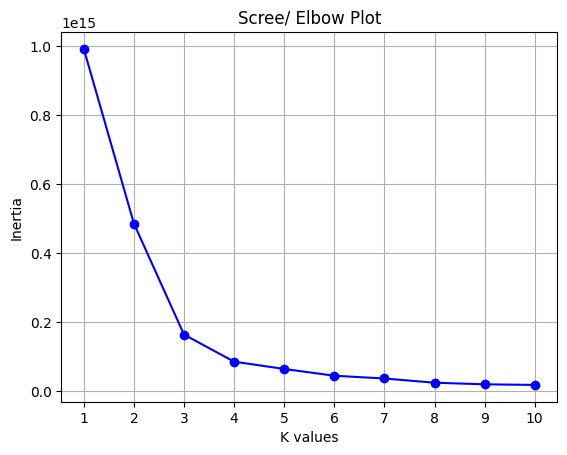

In [36]:
inertia = []
range_val = range(1,11)
for k in range_val:
    model = KMeans(n_clusters = k, init = 'k-means++',random_state = 30)
    model.fit(df1)
    inertia.append(model.inertia_)

plt.plot(range_val, inertia, 'bo-')
plt.xlabel('K values')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Inertia')
plt.title('Scree/ Elbow Plot')
plt.grid(True)
plt.show()

In [37]:
model = KMeans(4)
model.fit_predict(df3)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': model.labels_})], axis = 1)

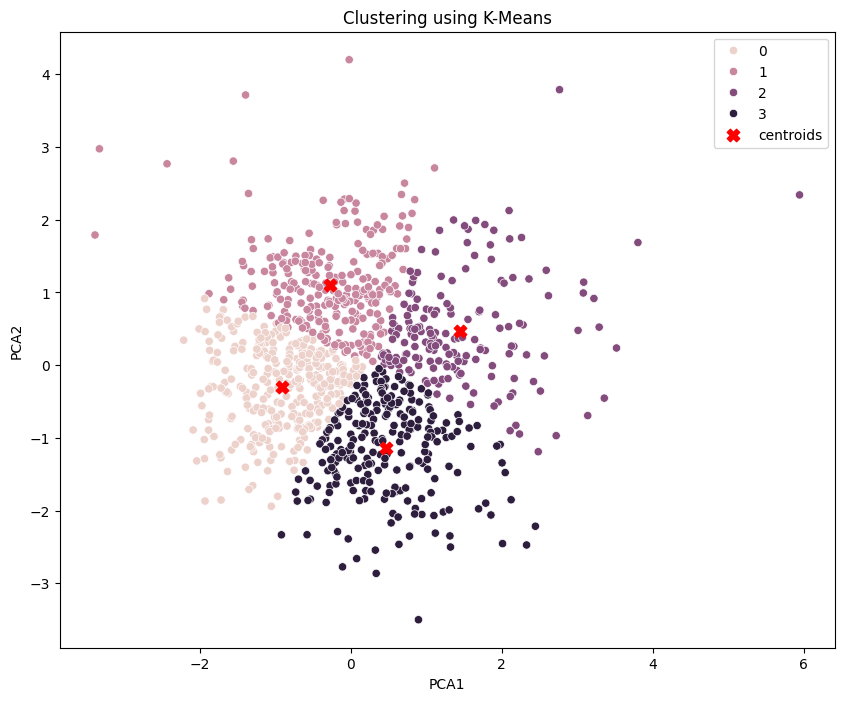

In [38]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

In [39]:
# Reshape data for KMeans
age_data = df[['age']]

# KMeans clustering into 3 groups
kmeans = KMeans(n_clusters=4, random_state=30)
df['age_cluster'] = kmeans.fit_predict(age_data)

# Print the cluster centers
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Centers: [[29.94824017]
 [63.1038961 ]
 [24.5989011 ]
 [48.57575758]]


In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = pca_df_kmeans[['PCA1', 'PCA2']]
y = pca_df_kmeans['cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[101   3   0   1]
 [  0  79   1   1]
 [  0   0  43   1]
 [  1   0   3  63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.96      0.98      0.97        81
           2       0.91      0.98      0.95        44
           3       0.95      0.94      0.95        67

    accuracy                           0.96       297
   macro avg       0.96      0.96      0.96       297
weighted avg       0.96      0.96      0.96       297



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


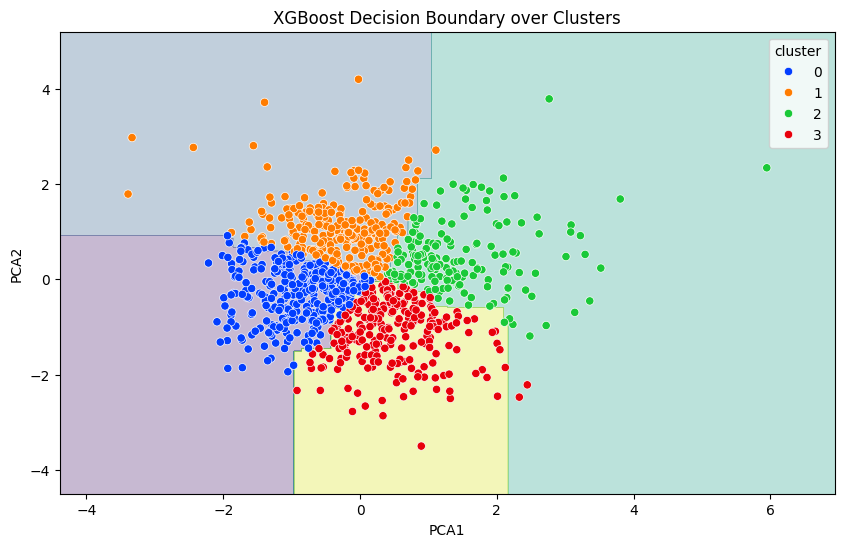

In [41]:
import numpy as np

# Create a meshgrid
x_min, x_max = X['PCA1'].min() - 1, X['PCA1'].max() + 1
y_min, y_max = X['PCA2'].min() - 1, X['PCA2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = xgb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df_kmeans, palette='bright')
plt.title('XGBoost Decision Boundary over Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [42]:
## Creating a target column 'Cluster' for storing clustered segments
new_df = pd.concat([df1, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
new_df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count,Cluster
0,30,16,1,1.770466e+06,2,3,6,5,2,0
1,27,0,1,7.600731e+05,2,3,12,1,4,3
2,28,19,1,2.779701e+06,0,4,3,5,4,3
3,26,19,1,1.473698e+06,2,4,14,3,2,0
4,25,19,1,2.430643e+06,2,4,4,1,4,0


In [43]:
df_0 = new_df[new_df['Cluster'] == 0]
df_1 = new_df[new_df['Cluster'] == 1]
df_2 = new_df[new_df['Cluster'] == 2]
df_3 = new_df[new_df['Cluster'] == 3]

<Axes: xlabel='Cluster', ylabel='count'>

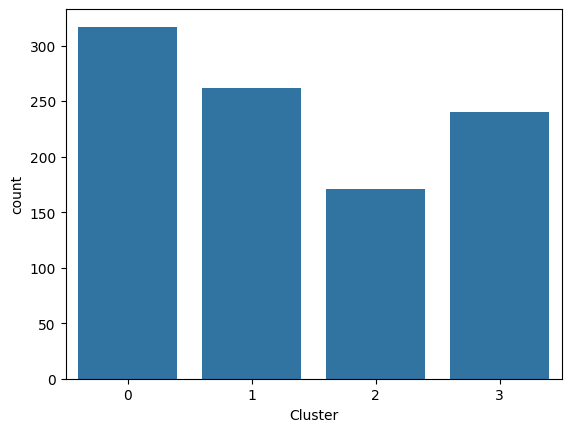

In [44]:
sns.countplot(x = 'Cluster', data = new_df)

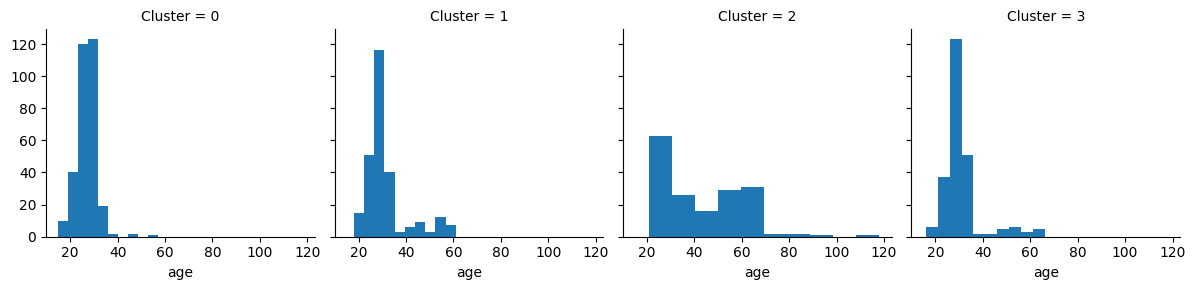

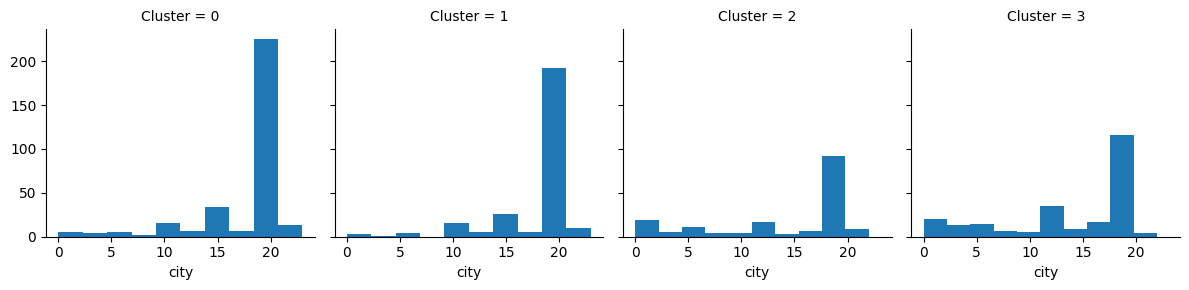

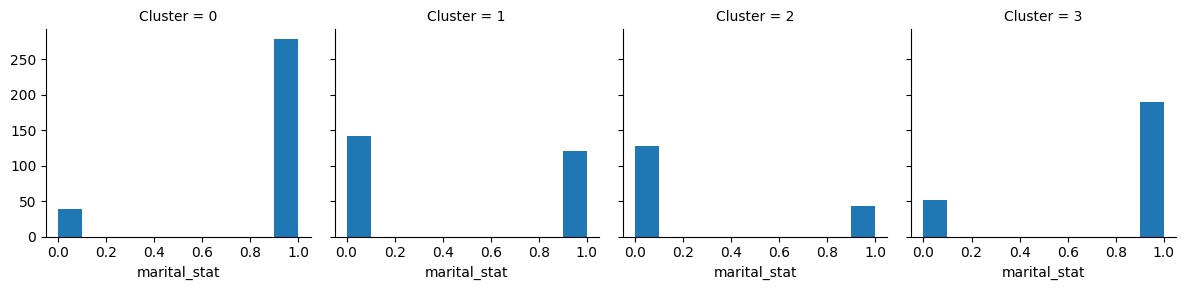

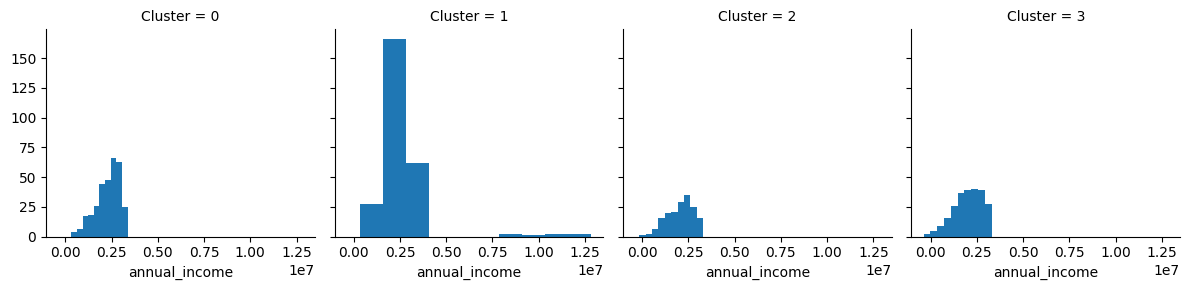

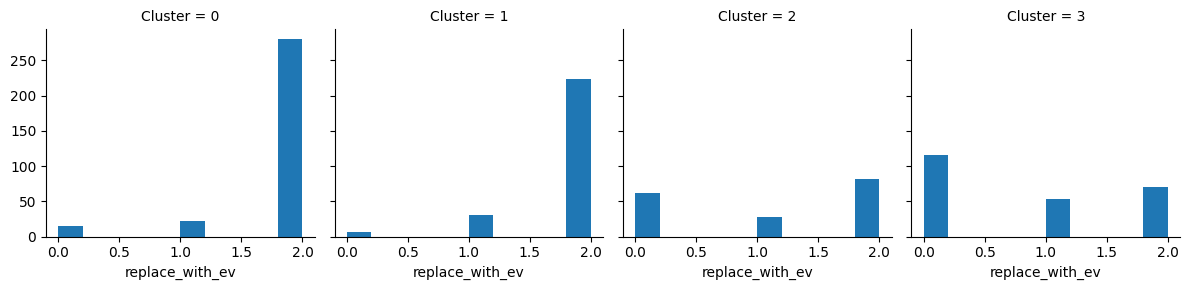

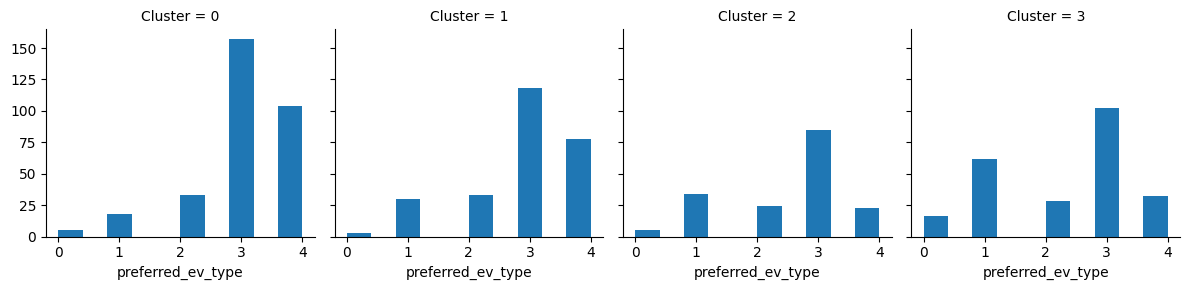

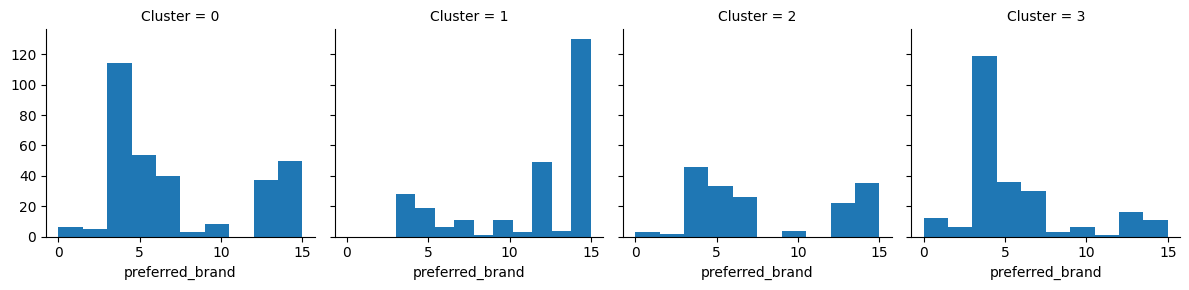

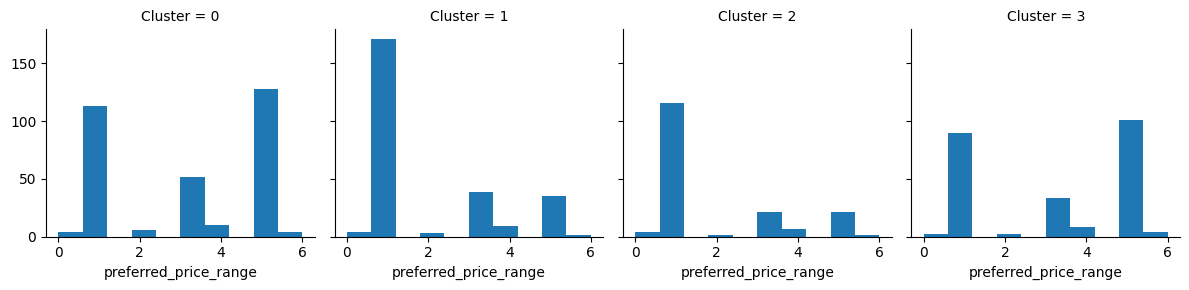

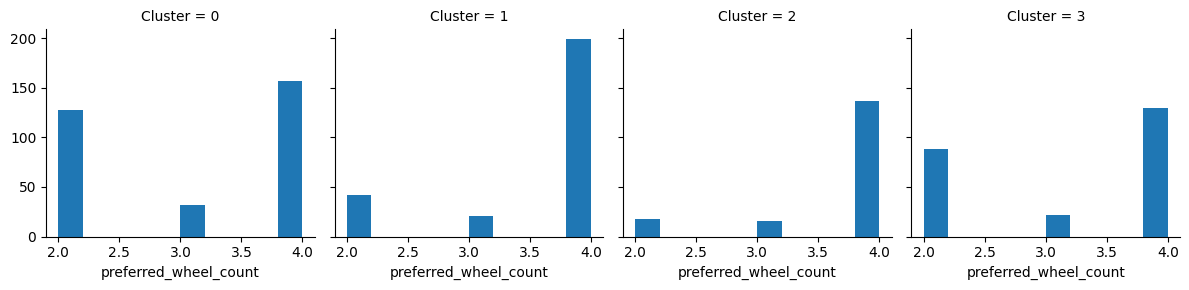

In [45]:
c_drop_new_df = new_df.drop(['Cluster'], axis = 1)

for c in c_drop_new_df:
    grid = sns.FacetGrid(new_df, col = 'Cluster')
    grid = grid.map(plt.hist, c)
plt.show()

In [46]:
cluster_count = new_df['Cluster'].value_counts()
cluster_count

,count
Cluster,
0,317
1,262
3,240
2,171


In [47]:
df5 = pd.concat([df, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
df5.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count,age_cluster,Cluster
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2,0,0
1,27,Ahmedabad,NaN,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4,2,3
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4,0,3
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2,2,0
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4,2,0


In [48]:
c_0 = df5[df5['Cluster'] == 0]
c_1 = df5[df5['Cluster'] == 1]
c_2 = df5[df5['Cluster'] == 2]
c_3 = df5[df5['Cluster'] == 3]

In [49]:
df=df.dropna(subset=['age'])
df['age']=pd.to_numeric(df['age'],errors='coerce')
df

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count,age_cluster
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2,0
1,27,Ahmedabad,NaN,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4,2
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4,0
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,32,Delhi,Salaried,Single,Graduate,3,2.259379e+06,Maybe,SUV,Yes,Honda,<15 lakhs,4,0
986,30,Pune,NaN,Single,Graduate,5,3.353677e+06,Yes,SUV,Yes,Tata,<25 lakhs,2,0
987,31,Pune,Salaried,Single,Graduate,2,5.689586e+05,Yes,SUV,Maybe,MG,<25 lakhs,4,0
988,31,Pune,NaN,Married,Graduate,4,3.162609e+06,Yes,SUV,No,Hyundai,<15 lakhs,2,0


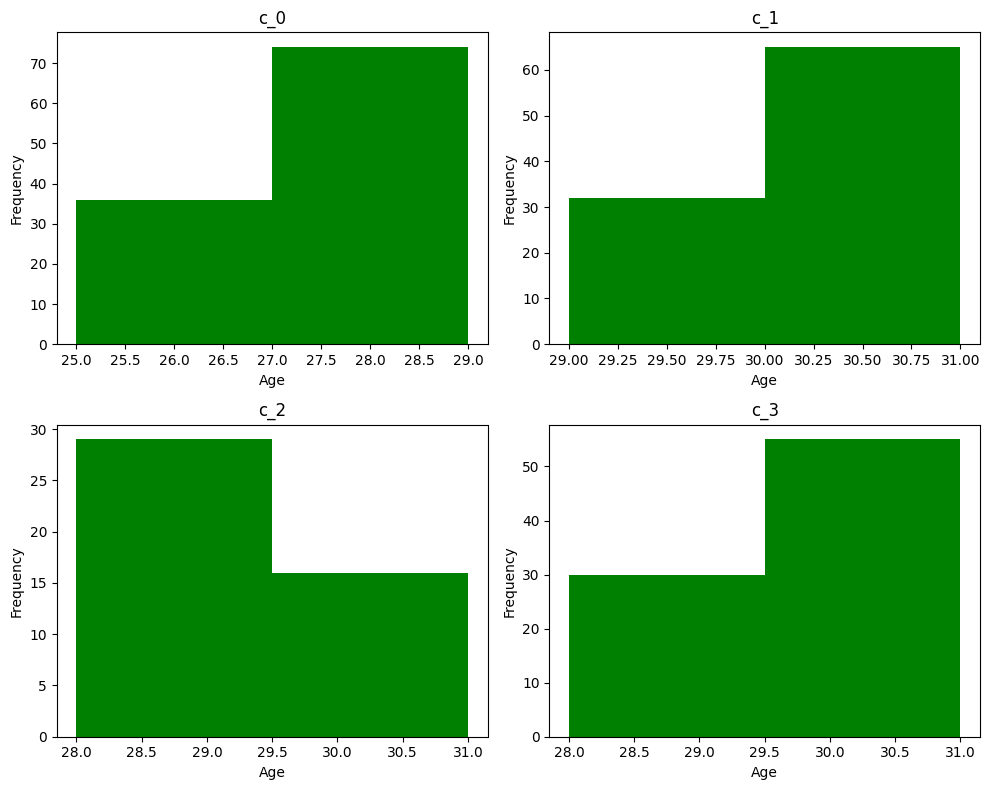

In [50]:
# List of your datasets
datasets = [c_0, c_1, c_2, c_3]

# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_ages = dataset['age'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ages.index, bins = 2, weights = top_ages.values, color = 'green')

    # Set labels and titles
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## SUV and Sedan are the most popular vehicle type found in all the clusters. So these are to be manufactured in maximum numbers.

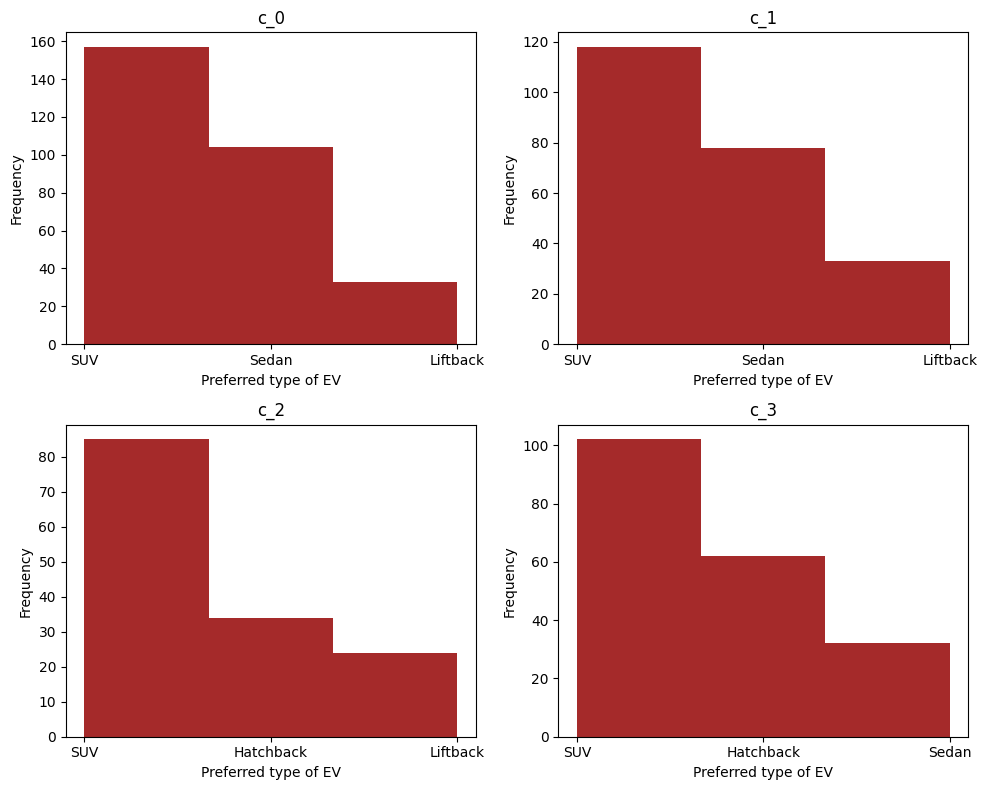

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_ev_type = dataset['preferred_ev_type'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ev_type.index, bins = 3, weights = top_ev_type.values, color = 'brown')

    # Set labels and titles
    ax.set_xlabel('Preferred type of EV')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

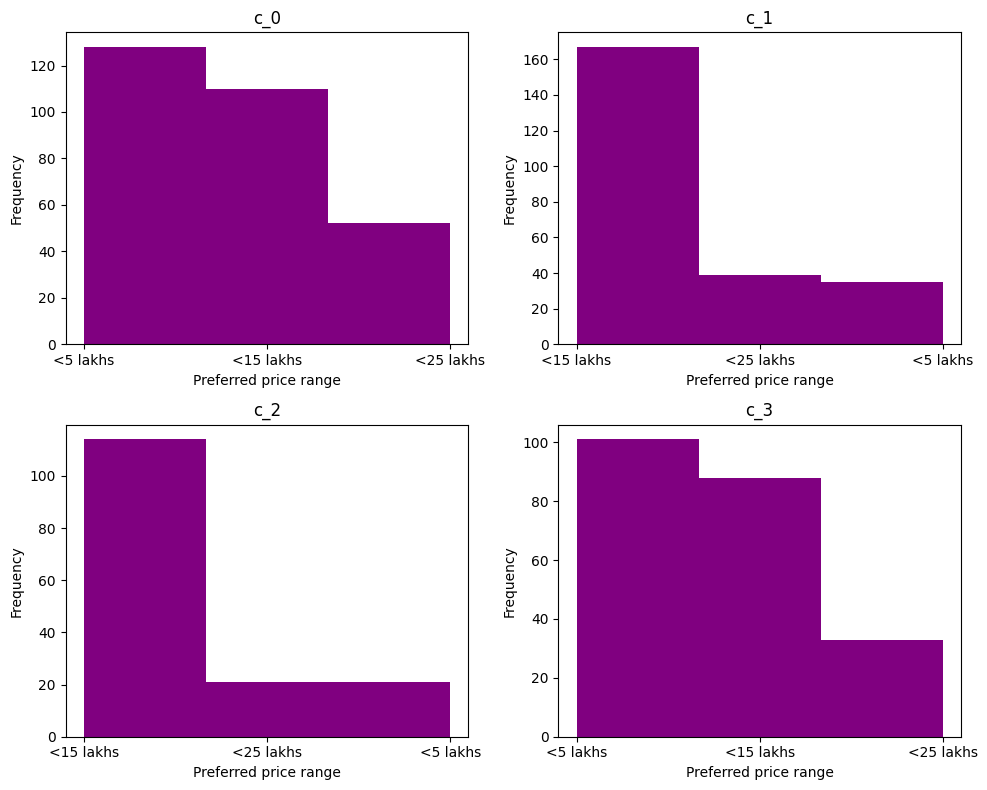

In [52]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i, dataset in enumerate(datasets):
    row = i//2
    col = i%2
    ax = axs[row, col]

    top_price_range = dataset['preferred_price_range'].value_counts().head(3)

    ax.hist(top_price_range.index, bins = 3, weights = top_price_range, color = 'purple')

    ax.set_xlabel('Preferred price range')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

plt.tight_layout()

plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df_clean = df.copy()
df_scaled = scaler.fit_transform(df1)
df2 = pd.DataFrame(df_scaled, columns = df1.columns)
df2.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,-0.159835,-0.018039,0.75428,-0.490254,0.669051,0.242489,-0.392423,1.337083,-1.524048
1,-0.425929,-3.025745,0.75428,-1.499700,0.669051,0.242489,0.934267,-0.887643,0.732956
2,-0.337231,0.545906,0.75428,0.518035,-1.807062,1.180238,-1.055768,1.337083,0.732956
3,-0.514627,0.545906,0.75428,-0.786744,0.669051,1.180238,1.376497,0.224720,-1.524048
4,-0.603325,0.545906,0.75428,0.169305,0.669051,1.180238,-0.834653,-0.887643,0.732956


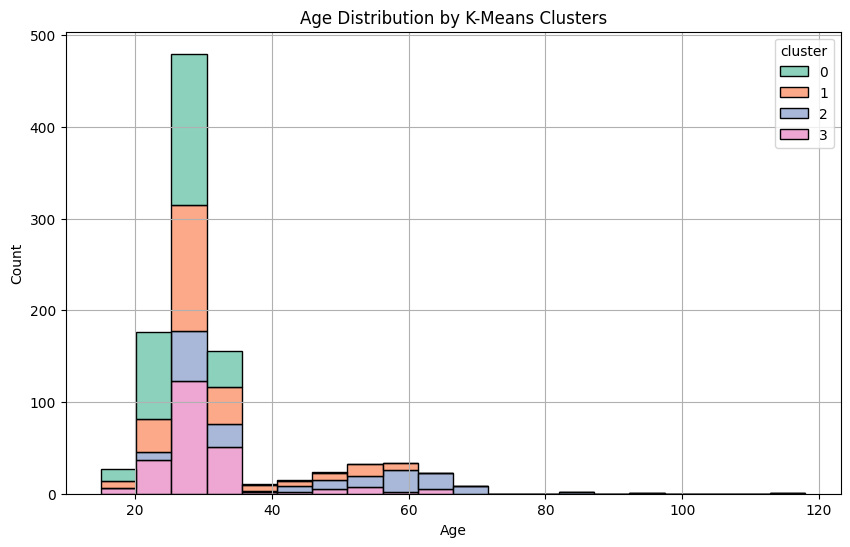

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
pca_df_kmeans_with_age = pd.concat([pca_df_kmeans, df1['age']], axis=1)

plt.figure(figsize=(10, 6))

sns.histplot(data=pca_df_kmeans_with_age, x='age', hue='cluster', multiple='stack', palette='Set2', bins=20)
plt.title("Age Distribution by K-Means Clusters")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

<ipython-input-58-3c4377eefa6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_age_by_brand, x='preferred_brand', y='age', palette='viridis')


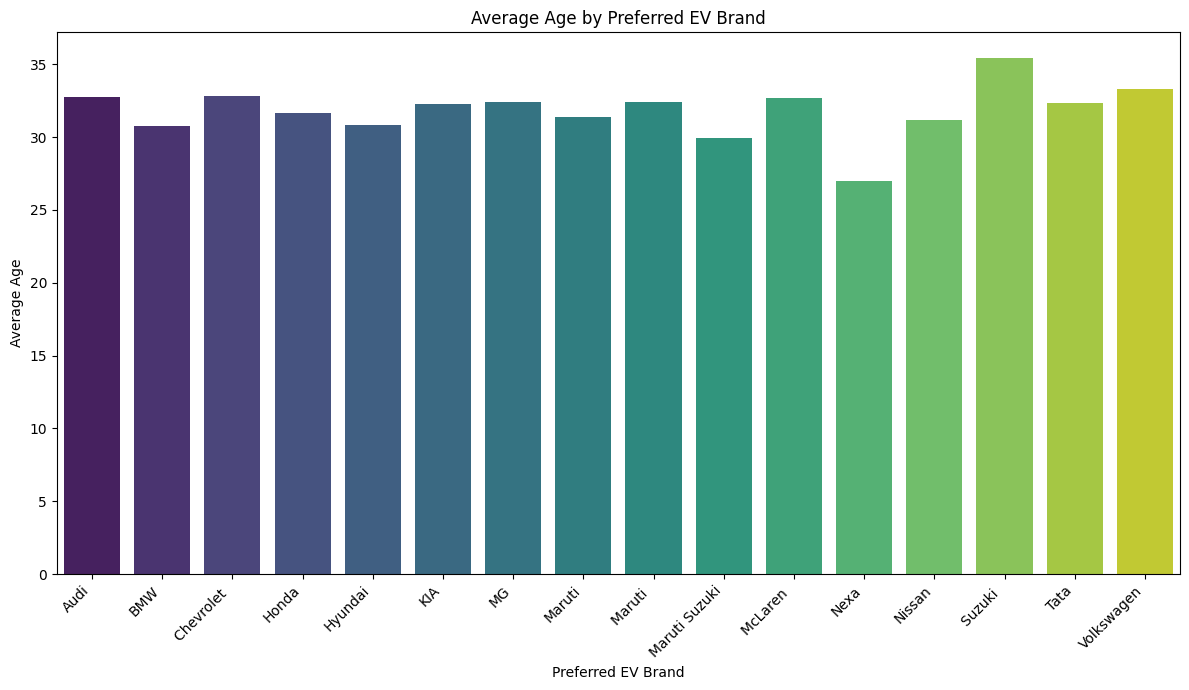

In [58]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.dropna(subset=['age'], inplace=True)
avg_age_by_brand = df.groupby('preferred_brand')['age'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_age_by_brand, x='preferred_brand', y='age', palette='viridis')
plt.title('Average Age by Preferred EV Brand')
plt.xlabel('Preferred EV Brand')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-65-d8218e35eb5f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_age_by_brand, x='preferred_brand', y='age', palette='viridis')


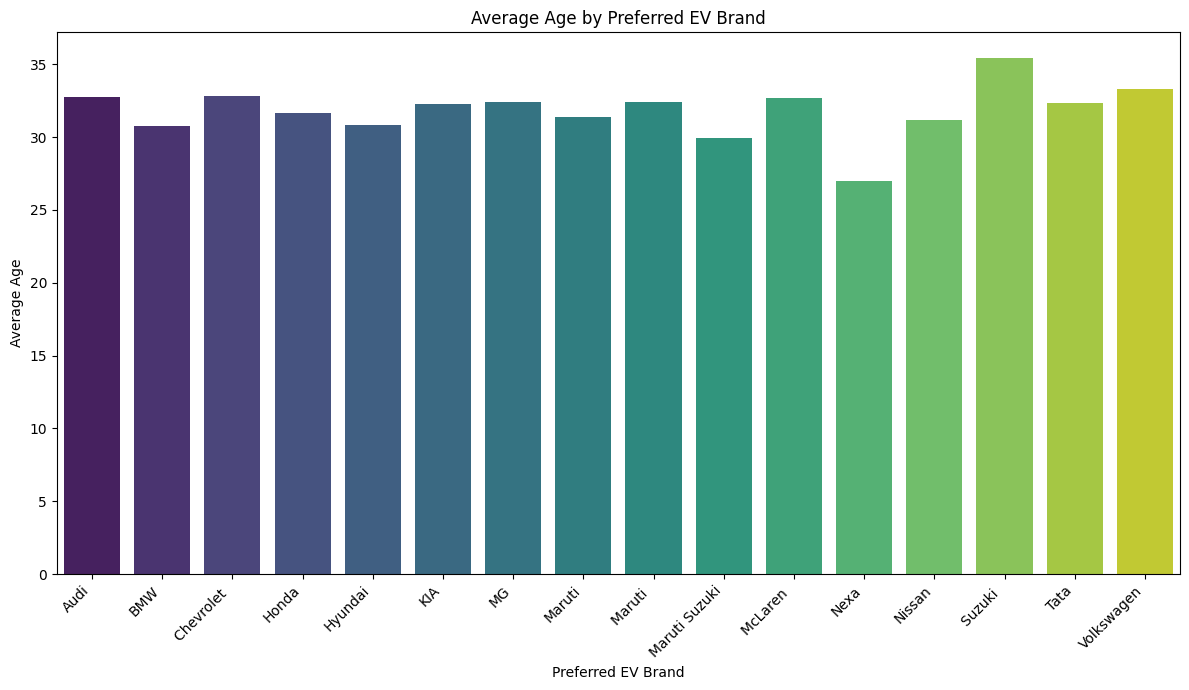

In [65]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.dropna(subset=['age'], inplace=True)

avg_age_by_brand = df.groupby('preferred_brand')['age'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=avg_age_by_brand, x='preferred_brand', y='age', palette='viridis')
plt.title('Average Age by Preferred EV Brand')
plt.xlabel('Preferred EV Brand')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<ipython-input-66-75e7fd784d0a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='preferred_price_range', y='age', palette='viridis', order=sorted(df1['preferred_price_range'].unique()))


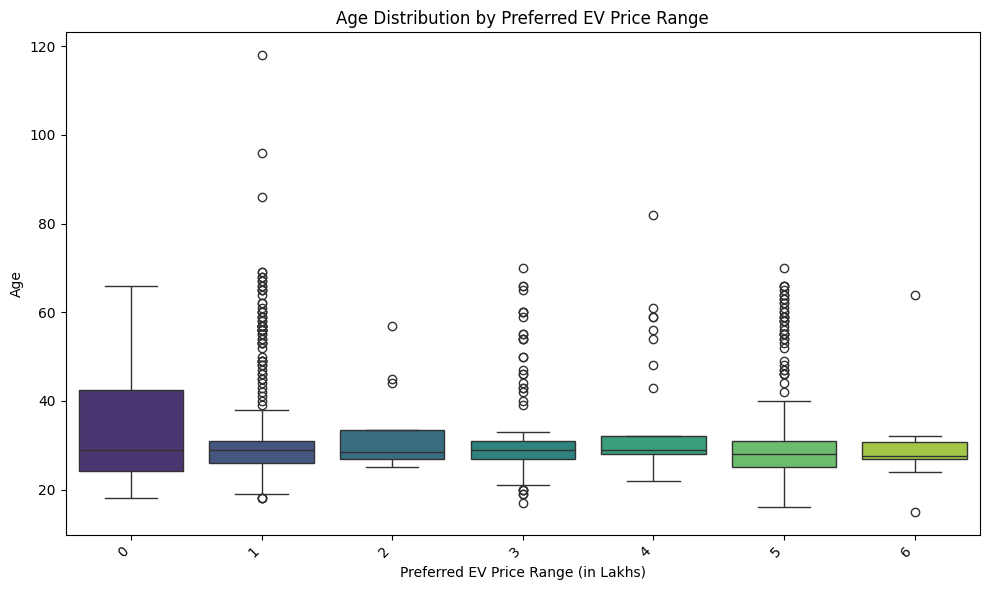

In [66]:
df1['age'] = pd.to_numeric(df1['age'], errors='coerce')
df1.dropna(subset=['age'], inplace=True)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='preferred_price_range', y='age', palette='viridis', order=sorted(df1['preferred_price_range'].unique()))
plt.title('Age Distribution by Preferred EV Price Range')
plt.xlabel('Preferred EV Price Range (in Lakhs)')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()